Forward-Backward Method on the Dual Problem
===========================

This numerical tour is an introduction to convex duality with an
application to total variation denoising.

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

In [1]:
from __future__ import division
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib




Convex Duality
--------------
Given a convex, proper, and lower semi-continuous function $f$ defined on $\RR^N$, its
_conjugate_ $f^*$ is the convex function defined as
$$ \forall u \in \RR^N, \quad f^*(u) = \umax{x \in \RR^N} \dotp{x}{u} - f(x). $$


One has $(f^*)^*=f$.

One can show that if $f(x) = \frac{1}{2} \norm{A x - b}^2$, where $A \in \RR^{N \times N}$
is an invertible matrix, then
$$f^*(u) = \frac{1}{2} \norm{(A^*)^{-1} u + b}^2- \frac{1}{2}\norm{b}^2$$

One can show that in the case of $\ell^p$ norms
$$ f(x) = \norm{x}_p = \pa{ \sum_{i=1}^N \abs{x_i}^p }^{1/p}, $$
with the usual extension to $p=+\infty$
$$ \norm{x}_\infty = \umax{1 \leq i \leq N} \abs{x_i},$$
then one has
$$ f^* = \iota_{\norm{\cdot}_q \leq 1}
 \qwhereq \frac{1}{p}+\frac{1}{q}=1, $$
where $\iota_{\Cc}$ is the indicator function of the convex set
$\Cc$.

Forward-backward on the Dual Problem
------------------------------------------
We are concerned with the minimization of composite problems of the form
$$ \umin{x \in \RR^N} f(x) + g(Lx) $$
where $ L \in  \RR^{P \times N} $ is a linear operator (a matrix),
 $f : \RR^N \rightarrow \RR $
and $g : \RR^P \rightarrow \RR $
are convex functionals.


We now assume that $f$ is $\beta$-strongly convex.
Then, $f^*$ is differentiable  and
its gradient is $\beta$-Lipschitz continuous.


In this case, the Fenchel-Rockafellar theorem shows that one can solve
the following _dual problem_
$$ \umin{u \in \RR^P} f^*( -L^* u ) + g^*(u) $$
and recover the unique solution $x^\star$
of the primal problem from a (non-necessarily unique) solution $u^\star$
of the dual problem, as
$$ x^\star = \nabla f^*( -L^* u^\star ). $$

Moreover, the optimal primal and dual costs satisfy
$$ E^\star= f(x^\star) + g(Lx^\star) =
  -  f^*( -L^* u^\star ) - g^*(u^\star). $$


Denoting $F(u) = f^*( -L^* u )$ and $G(u) = g^*(u)$, one thus needs
to solve the problem
$$ \umin{u \in \RR^P} F(u) + G(u). $$


We assume that the function $g$ is simple, in the sense that
one can apply the proximity operator $\mathrm{prox}_{\ga g}$
for any $\ga > 0$.

Then, $G=g^*$ is simple as well, 
because of the
Moreau identity
$$ x = \text{prox}_{\ga g^*}(x) + \ga \text{prox}_{g/\ga}(x/\ga). $$


Since $F$ is smooth and $G$ is simple, one can apply the
forward-backward algorithm, which reads,
after initilizing $u^{(0)} \in \RR^P$,
$$ u^{(k+1)} = \text{prox}_{\ga G}\pa{ u^{(k)} - \ga \nabla F( u^{(k)} )  }. $$



The primal iterates are defined as
$$ x^{(k)} = \nabla f^*( -L^* u^{(k)} ). $$

So, we can write the algorithm in the primal-dual form
$$
\left|\begin{array}{l}
x^{(k)} = \nabla f^*( -L^* u^{(k)} )\\
u^{(k+1)} = \text{prox}_{\ga g^*}\pa{ u^{(k)} + \ga Lx^{(k)}}.
\end{array}\right.
$$

If $0< \ga < 2/(\beta\|L\|^2)$, $x^{(k)}$ converges to a primal solution $x^\star$ and $u^{(k)}$ converges to a dual solution $u^\star$.


Total Variation
---------------

Like in lab 1, we are interested in imaging inverse problems: we want to estimate the unknown sharp image $s^\sharp$ from the data $y=Ax^\sharp\ +\mbox{ noise}$, where $A$ is the linear observation operator. 

In lab 1, we
defined the 'discrete gradient' $D$ and we used as regularizer the Tikhonov functional $\frac{1}{2}\|Dx\|^2_{2,2}=\frac{1}{2}\sum_{n_1,n_2} \|(Dx)_{n_1,n_2}\|^2_2=\frac{1}{2}\sum_{n_1,n_2} (Dx)_{n_1,n_2,v}^2+(Dx)_{n_1,n_2,h}^2$.

A better regularizer for imaging problems is the _total variation_, which corresponds to taking the $\ell_1$ norm instead of the squared $\ell_2$ norm of the discrete gradient:

$$\mathrm{TV}(x)=\|Dx\|_{1,2}=\sum_{n_1,n_2} \|(Dx)_{n_1,n_2}\|_2=\sum_{n_1,n_2} \sqrt{ (Dx)_{n_1,n_2,v}^2+(Dx)_{n_1,n_2,h}^2}.$$

The total variation was first introduced in L. I. Rudin, S. Osher, E. Fatemi,
"Nonlinear total variation based noise removal algorithms," _Physica D_, vol. 60, 1992.

The difficulty is that there is no way to compute the proximity operator of the total variation in 2-D (fast exact algorithms exist in 1-D). So, we must view it as the simple functional $\lambda \|\cdot\|_{1,2}$ composed with the linear operator $D$.
Indeed, the proximity operator of $\lambda \|\cdot\|_{1,2}$ is simply elementwise soft-thresholding of the magnitude of the vector field. 

So, if $A$ is invertible, the dual forward-backward algorithm is appropriate to solve least-squares problems regularized with the total-variation.


## Denoising Lena

In the following, we consider the image denoising problem, i.e. $A=\mathrm{Id}$, applied to the Lena image. So, given the noisy image $y$, we want to estimated the clean Lena image $x^\sharp$ by the image $x^\star$ solution to the strongly convex primal problem

$$\umin{x \in \RR^{N_1\times N_2}} E_p(x)= f(x)+g(Dx)=\frac{1}{2}\|x-y\|^2+\lambda\|Dx\|_{1,2}$$

The dual problem is

$$\umin{u \in \RR^{N_1\times N_2\times 2}} E_d(u)= f^*(-D^*u)+g^*(u)=\frac{1}{2}\|-D^*u+y\|^2- \frac{1}{2}\norm{y}^2+\imath_{\|\cdot\|_{\infty,2}\leq\lambda}(u)$$

Chambolle Dual Algorithm 
-------------------------

We will solve the total-variation regularized denoising problem by applying the forward-backward algorithm on the dual problem. This is sometimes called the _Chambolle Dual Algorithm_, because this idea was initially proposed in
A. Chambolle,
"An Algorithm for Total Variation Minimization and Applications",
_Journal of Mathematical Imaging and Vision_, 20(1-2), 2004.

Note that since $g^*$ is an indicator function, the forward-backward algorithm reverts to projected gradient descent.

For a more general framework, see
P. L. Combettes, D. Dung, and B. C. Vu,
"Dualization of signal recovery problems",
_Set-Valued and Variational Analysis_, vol. 18, 2010


We create the noisy image $y$.

In [2]:
from scipy import misc
xsharp = misc.lena()
xsharp = xsharp.astype(float32)

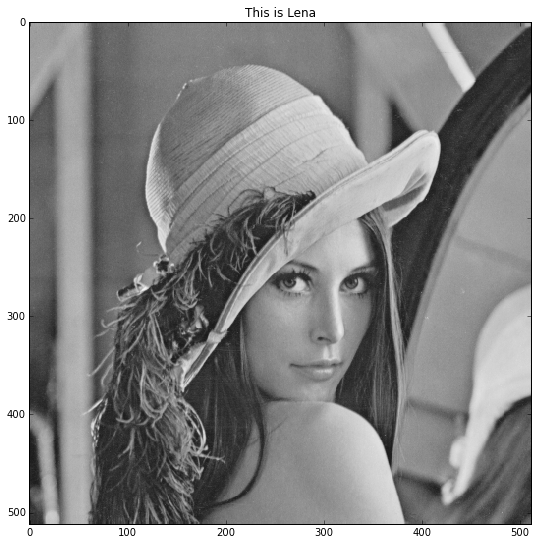

In [3]:
figsize(9,9)
imshow(xsharp, interpolation='nearest', cmap=cm.gray, vmin=0, vmax=255)
title('This is Lena')

In [4]:
(N1,N2) = shape(xsharp)
noiselevel = 20
y = xsharp + noiselevel * randn(N1,N2)

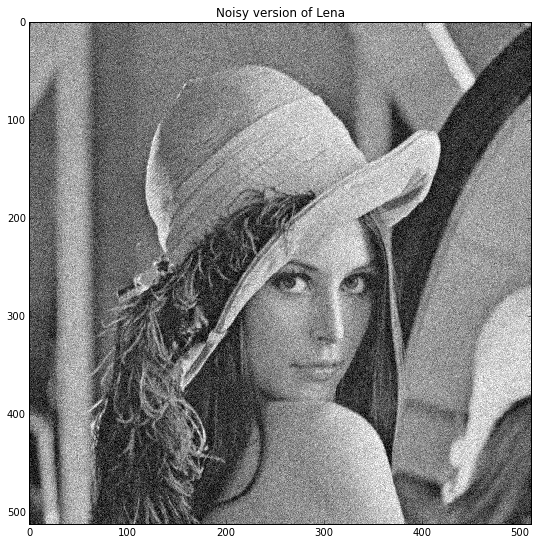

In [5]:
figsize(9,9)
imshow(y, interpolation='nearest', cmap=cm.gray, vmin=0, vmax=255)
title('Noisy version of Lena')

We define the discrete gradient operator $D$ and its adjoint $D^*$.

In [6]:
D = lambda x : c_['2,3',r_[diff(x,1,0), zeros([1,x.shape[1]])],c_[diff(x,1,1), zeros([x.shape[0],1])]]

In [7]:
Dadj = lambda v : r_['0,2',-v[0,:,0],-diff(v[:-1,:,0],1,0),v[-2,:,0]] + c_['1,2',-v[:,0,1],-diff(v[:,:-1,1],1,1),v[:,-2,1]]

The gradient of $f^*$ is simply $\nabla f^*:x\mapsto x+y$.

In [8]:
def grad_f_conj (x,y) :
    return x + y

The proximity operator $\text{prox}_{\ga g^*}$ does not depend on $\gamma$ and is such that $$\big(\text{prox}_{\ga g^*}(u)\big)_{n_1,n_2}=\frac{1}{\max(\|u_{n_1,n_2}\|_2/\lambda,1)}u_{n_1,n_2}\in\mathbb{R}^2,\quad\forall (n_1,n_2).$$

In [9]:
def prox_g_conj (u, Lambda) :
    return u/tile(maximum(sqrt(sum(u**2,2,keepdims=True))/Lambda,1),(1,1,2)) # soft-thresholding

__Exercise__ 

Write the code of the dual forward-backward iteration for denoising.

In [11]:
Lambda = 25
gamma = 1.9/8 # we must have 0 < gamma < 2/8
nbiter = 400
(N1,N2) = y.shape
u = zeros([N1,N2,2])
Ep_array = zeros(nbiter) # array for the primal energy E_p
Ed_array = zeros(nbiter) # array for the dual energy E_d
sqnormy = norm(y)**2/2
for iter in range(nbiter):  
    # put your code here
    Ep_array[iter] = norm(x-y)**2/2 + Lambda*sum(sqrt(sum(D(x)**2,2))) 
    Ed_array[iter] = norm(y-Dadj(u))**2/2 - sqnormy
xdenoised = x

We display the denoised image.

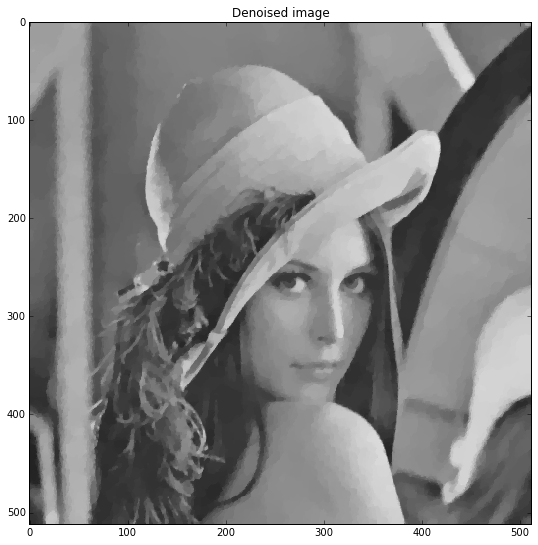

In [12]:
figsize(9,9)
imshow(xdenoised, interpolation='nearest', cmap=cm.gray, vmin=0, vmax=255)
title('Denoised image')

We check that the primal energy and the opposite of the dual energy converge to the same value 

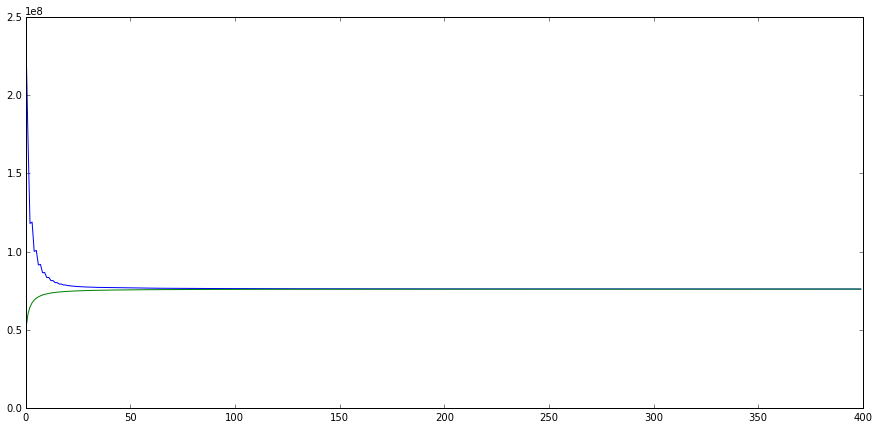

In [13]:
figsize(15,7)
plot(Ep_array)
plot(-Ed_array)

We plot the difference in log-scale.

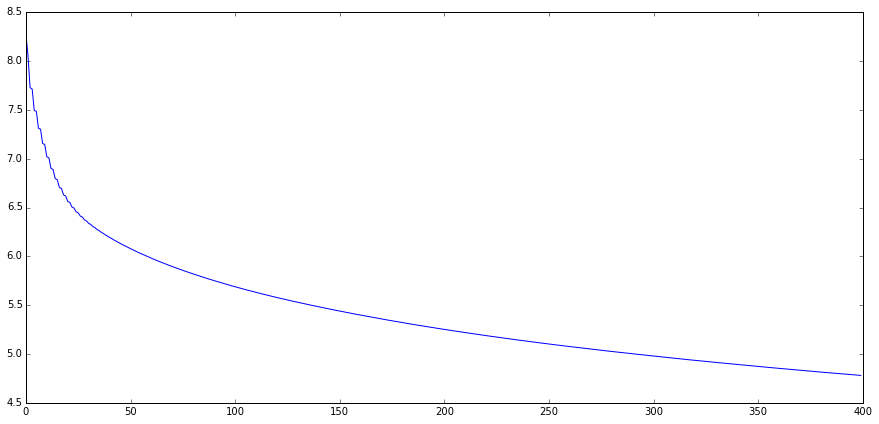

In [14]:
figsize(15,7)
plot(log10(Ep_array+Ed_array))

We observe that the convergence is slow: $E_d$ decreases like $O(1/k)$ 

__Exercise__

Write the code with the forward-backward algorithm replaced by the FISTA-like accelerated forward-backward algorithm (see the NT on Forward-Backward).

In [91]:
gamma = # put the right value here
a = 3   # try different values
Lambda = 25
nbiter = 400
(N1,N2) = y.shape
Ep_array_fista = zeros(nbiter) # array for the primal energy E_p
Ed_array_fista = zeros(nbiter) # array for the dual energy E_d
sqnormy = norm(y)**2/2
# put your code here
for iter in range(nbiter):
    # put your code here
    Ep_array_fista[iter] = norm(x-y)**2/2 + Lambda*sum(sqrt(sum(D(x)**2,2))) 
    Ed_array_fista[iter] = norm(y-Dadj(u))**2/2 - sqnormy
xdenoised = x

We compare the convergence speed of the two algorithms.

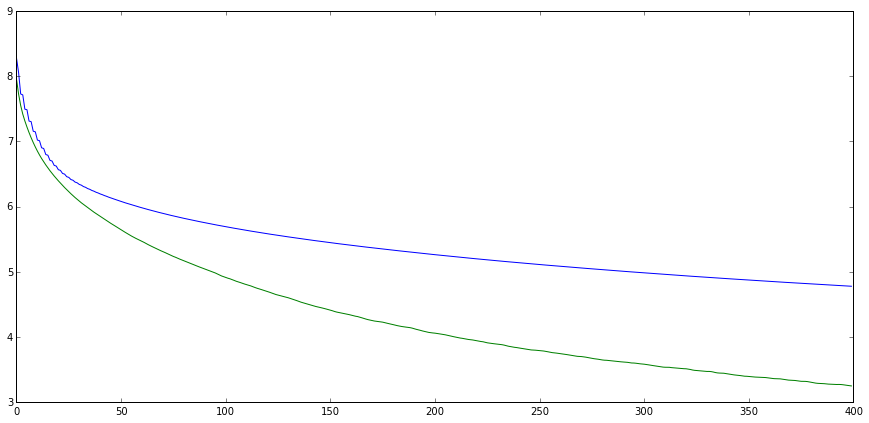

In [93]:
figsize(15,7)
plot(log10(Ep_array+Ed_array))
plot(log10(Ep_array_fista+Ed_array_fista))

We observe again that the accelerated forward-backward algorithm, with its convergence in $O(1/k^2)$, is much faster than the forward-backward algorithm.

But for image processing applications, a rough precision is sufficient. Here, the image obtained with 50 iterations of the accelerated forward-backward algorithm is visually identical to the one obtained with much more iterations.